**Titanic_Project**

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?

In [192]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [193]:
#DataFrame
titanic_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#Preview
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [194]:
#Reorganize Data

#Combine SibSp and Parch into a new Varible 'Family'
titanic_df['Family'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df['Family'].loc[titanic_df['Family']>0] = 1
titanic_df['Family'].loc[titanic_df['Family']==0] = 0


In [195]:
test_df['Family'] = test_df['SibSp'] + test_df['Parch']
test_df['Family'].loc[test_df['Family']>0] = 1
test_df['Family'].loc[test_df['Family']==0] = 0

In [196]:
# Varible Person to indicate male, female or child
def getperson(passenger):
    age,sex = passenger
    if age<16:
        return 'child'
    else:
        return sex

titanic_df['Person'] = titanic_df[['Age','Sex']].apply(getperson,axis= 1)


In [197]:
titanic_df.drop(['SibSp','Parch','Ticket','Name'],axis = 1,inplace = True)


In [198]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Person
0,1,0,3,male,22.0,7.2500,NaN,S,1,male
1,2,1,1,female,38.0,71.2833,C85,C,1,female
2,3,1,3,female,26.0,7.9250,NaN,S,0,female
3,4,1,1,female,35.0,53.1000,C123,S,1,female
4,5,0,3,male,35.0,8.0500,NaN,S,0,male


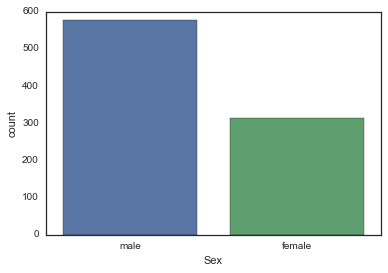

In [199]:
sns.countplot('Sex',data = titanic_df)

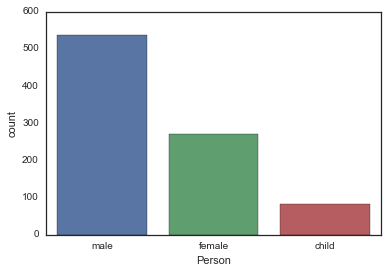

In [200]:
sns.countplot(x='Person', data=titanic_df)

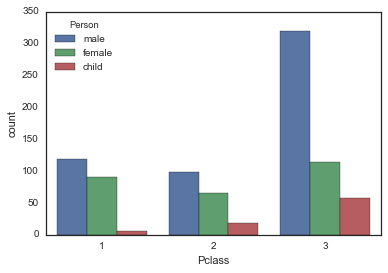

In [232]:
# Let's try the factorplot again!
sns.countplot('Pclass',data=titanic_df,hue='Person')

In [202]:
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()

In [203]:
person_perc

,Person,Survived
0,child,0.590361
1,female,0.756458
2,male,0.163873


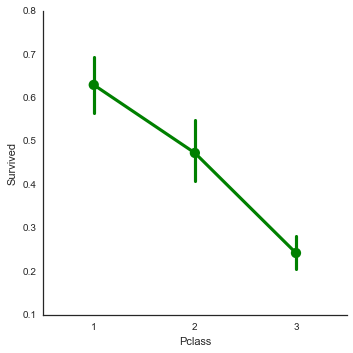

In [204]:
# Survival Rate relating to Pclass
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5,color = 'green')

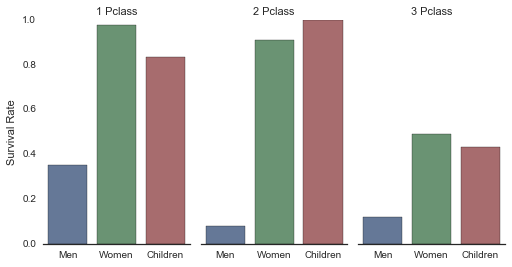

In [205]:
# Survival Rate relating to Pclass & Person
g = sns.factorplot(x="Person", y="Survived", col="Pclass",data=titanic_df, saturation=.5,kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate") 
  .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))

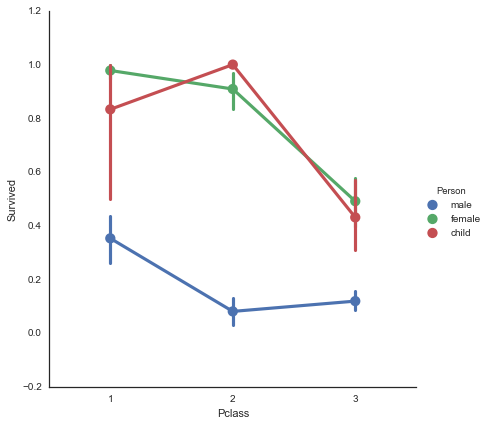

In [226]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot('Pclass','Survived',hue='Person',data=titanic_df,size =6)

In [229]:
#Cabin

## First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [209]:
# So let's grab that letter for the deck level with a simple for loop

# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_sort_df = cabin_df.sort(columns=['Cabin'],axis=0, ascending=True,inplace=False)

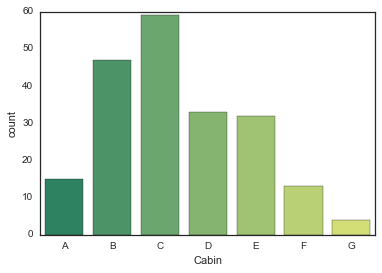

In [228]:
#Plot number of passenger in each cabin
sns.countplot('Cabin',data=cabin_sort_df,palette='summer')

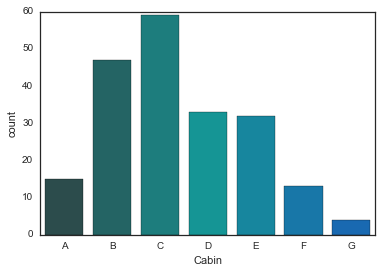

In [211]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_sort_df = cabin_sort_df[cabin_sort_df['Cabin'] != 'T']
#Replot
sns.countplot('Cabin',data=cabin_sort_df,palette='winter_d')

In [212]:
decks_df = titanic_df[['Survived','Cabin']]
decks_df = decks_df.dropna()
# Set empty list
aka = []

# Loop to grab first letter
for i in decks_df['Cabin']:
    aka.append(i[0])    
decks_df['Cabin'] = aka
# Remove T Cabin
decks_df = decks_df[decks_df['Cabin'] != 'T']
decks_sort_df = decks_df.sort(columns=['Cabin'],axis=0, ascending=True,inplace=False)

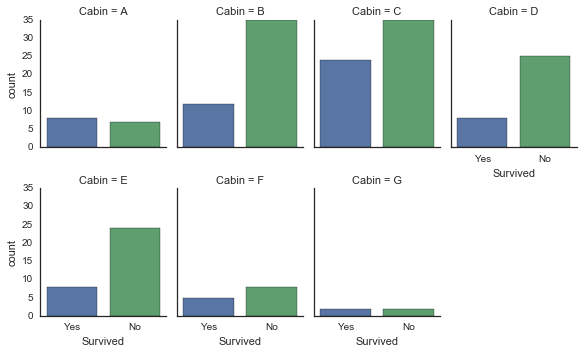

In [213]:
#Columns Order in Grid
order = sorted(decks_df.Cabin.unique())
#Explore survival rate of different Cabin
h = sns.factorplot("Survived", col="Cabin", col_wrap=4,
                   data=decks_df, col_order = order,
                    kind="count", size=2.5, aspect=.8)
h.set_xticklabels(["Yes", "No"])

[<matplotlib.text.Text at 0x2e367e80>, <matplotlib.text.Text at 0x2e389550>]

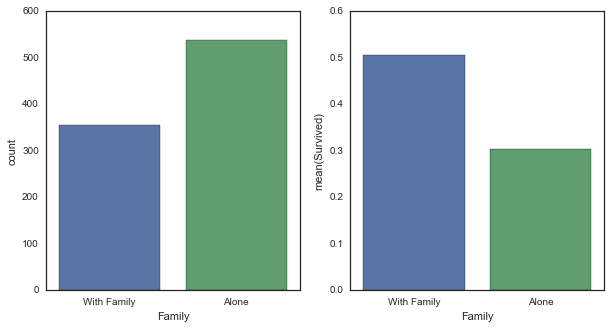

In [238]:
#Family

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

The survival rate of those who with family members is 20% higher than those who are alone. Family factor contrubutes to higher surviual rate. 

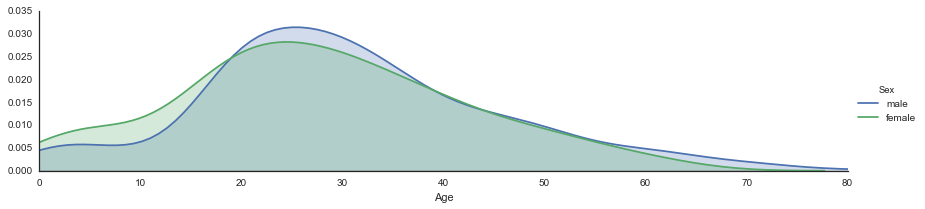

In [214]:
#Age

fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

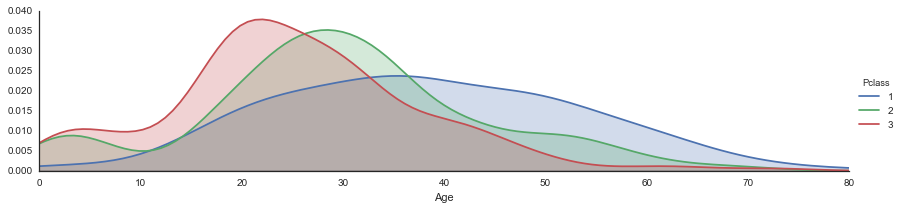

In [216]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

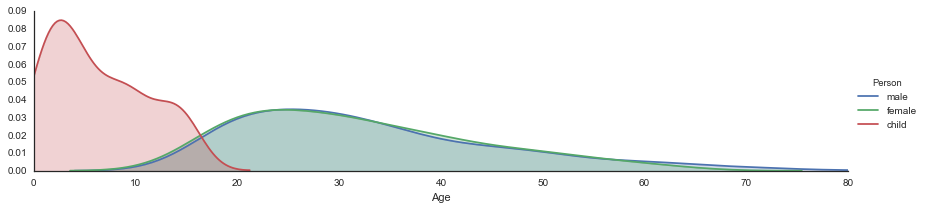

In [233]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(titanic_df, hue="Person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

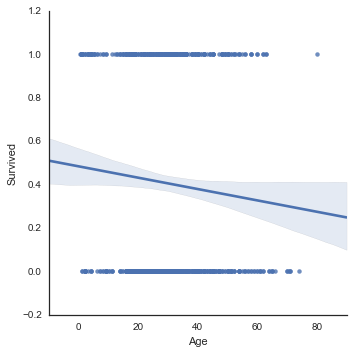

In [234]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df)

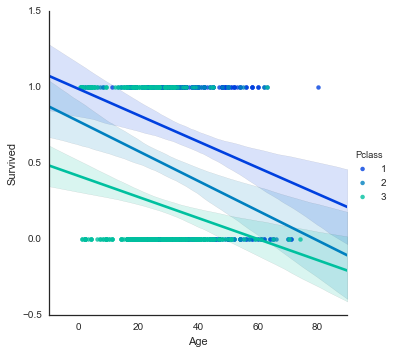

In [235]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

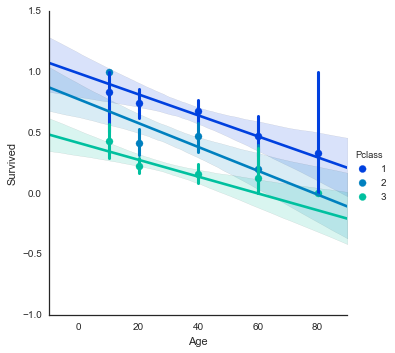

In [236]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

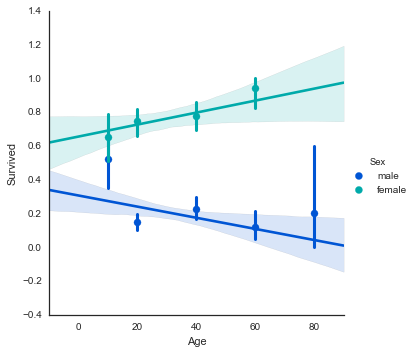

In [237]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

This gragh indicates an insightful fact that while the older female passengers are more likely to survive, older male passengers seem to have the highest dead rate.